### Burden and Rank Sum Tests of Drugs that have a side effect of Obesity

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
csfont = {'fontname':'Arial'}


In [2]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/all_data.csv"

In [3]:
df = pd.read_csv(path_to_file, header=None, index_col=0)
df2 = df.rename(columns={1:'gene'}, inplace=False)


In [4]:
pd.set_option('display.max_rows', 500)


In [5]:
df2.size

2457

In [6]:
path_to_file_2 = "/Users/aditgupta/Google Drive/Research/T2D/weight.csv"

In [7]:
df3 = pd.read_csv(path_to_file_2, header=None, index_col=0)

In [8]:
df3
df4 = df3.rename(columns={1:'gene'}, inplace=False)

In [9]:
df6 = df4.dropna()
len(df6['gene'].unique())

126

In [10]:
df5 = pd.merge(df2, df6, on='gene', how='inner')
df5

,gene,2,3,4,5,6,7,8,9,10,11,12,13
0,KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
1,AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
2,NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
3,XDH,0.14656,0.0064064,0.2577,0.45331,0.0059308,0.041012,0.049833,0.01674,0.0003066,0.22637,0.5921,0.25526
4,ALK,0.3058,0.15286,0.32471,0.10243,0.080525,0.13381,0.10962,0.15582,0.43749,0.39687,0.53418,0.36655
5,ABCC8,0.21002,0.32226,0.3885,0.50763,0.33093,0.17989,0.25546,0.0090463,0.22065,0.30258,0.23117,0.14762
6,BCL2,0.058643,0.67661,0.007571,0.18599,0.20316,0.16585,0.15833,0.1473,0.63841,0.25355,0.44229,0.39242
7,SV2A,0.34594,0.25589,0.064075,0.27282,0.024534,0.00165,0.46943,0.084069,0.0090649,0.10159,0.026143,0.1729
8,NR1I2,0.19452,0.19478,0.030496,0.50151,0.23753,0.094493,0.48482,0.32032,0.26014,0.094558,0.013724,0.10563
9,MAPT,0.12226,0.28095,0.062191,0.74494,0.073071,0.094287,0.12196,0.12947,0.37438,0.27444,0.089685,0.079616


In [11]:
df7 = df5.dropna(subset = ['gene'])
wanted = df7['gene'].unique()

In [12]:
string_to_write = "\n".join(wanted)
with open("wanted_20.txt", "w") as f:
    f.write(string_to_write)

In [13]:
df5 = df5.set_index("gene")

In [14]:
df5.head()

,2,3,4,5,6,7,8,9,10,11,12,13
gene,,,,,,,,,,,,
KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
XDH,0.14656,0.0064064,0.2577,0.45331,0.0059308,0.041012,0.049833,0.01674,0.0003066,0.22637,0.5921,0.25526
ALK,0.3058,0.15286,0.32471,0.10243,0.080525,0.13381,0.10962,0.15582,0.43749,0.39687,0.53418,0.36655


In [15]:
df5 = df5.astype(np.float32)

In [16]:
bmi_obe_synthetic = np.array([0.00079371,0.0038529, 0.0038692, 0.011781, 0.016211, 0.020746,0.023691,0.025932,0.031883,0.03346,0.034047,0.042854,0.045173,0.050497,0.050799, 0.052086,0.052312,0.057919,0.064807,0.071449,0.076924,0.077906,0.082264,0.089912,0.091958,0.1219,0.12432,0.13278,0.1383,0.14031,0.14055,0.14078,0.1431,0.14611,0.14673,0.14708,0.16128,0.16421,0.16679,0.16906,0.17604,0.1802,0.18065,0.18321,0.18527,0.20456,0.20575,0.20709,0.21287,0.21325,0.21722,0.21781,0.23288,0.23341,0.23601,0.2409,0.24554,0.24683,0.25484,0.25776,0.27397,0.28105,0.29017,0.29022,0.29842,0.29855,0.30654,0.31335,0.37021,0.39238,0.39683,0.40993,0.41709,0.42105, 0.42813,0.43352,0.46393,0.47006,0.49413,0.50238,0.51816,0.54151,0.5448,0.55668,0.56105,0.56837,0.58265,0.58482,0.58714, 0.65654, 0.748320,.87922])

In [17]:
fast_insulin_obe_synthetic = np.array([0.001082,0.0016243,0.0032657,0.00684,0.020092,0.020111,0.025561,0.027516,0.03451,0.039758,0.039967,0.040977,0.043761,0.045895,0.046694,0.059579,0.062997,0.064848,0.066645,0.075656,0.079519,0.081533,0.082935,0.085064,0.092022,0.095618,0.1207,0.13698,0.14036,0.14585,0.15562,0.15628,0.15647,0.16976,0.17064,0.17182,0.17717,0.18694,0.18819,0.19511,0.20046,0.20225,0.21469,0.22138,0.22344,0.23146,0.2511,0.25628,0.26565,0.2745,0.28223,0.28629,0.28879,0.31492,0.31855,0.32806,0.33531,0.34331,0.3453,0.34985,0.35149,0.35653,0.36748,0.37015,0.37892,0.38481,0.39798,0.44337,0.44639,0.45117,0.45477,0.45665,0.49636,0.51422,0.52191,0.53849,0.54477,0.54534,0.54534,0.58669,0.59918,0.6225,0.64193,0.64866,0.68637,0.68832,0.69885,0.79252,0.79313,0.83817,0.87012,0.92403])

In [18]:
dbp_obe_synthetic = ([0.000000022889,	0.00004608,	0.000066945,	0.0002258,	0.0034237,	0.0061159,	0.0086051,	0.012321,	0.01724,	0.017506,	0.017629,	0.021403,	0.022644,	0.026643,	0.027507,	0.03064,	0.032194,	0.037891,	0.040311,	0.042834,	0.04507,	0.056788,	0.062628,	0.066,	0.070895,	0.078396,	0.079644,	0.080668,	0.084587,	0.094796,	0.1066,	0.12505,	0.12693,	0.13653,	0.13683,	0.1392,	0.14274,	0.14772,	0.14832,	0.15009,	0.1518,	0.15524,	0.15786,	0.15886,	0.16933,	0.17196,	0.2014,	0.21268,	0.21477,	0.21887,0.23124,	0.2318,	0.24528,	0.26021,	0.30421,	0.31021,	0.32456,	0.32985,	0.3318,	0.3325,	0.34769,	0.377,	0.40029,	0.41799,	0.42065,	0.43235,	0.43409,	0.43653,	0.44024,	0.44377,	0.44631,	0.4549,	0.46191,	0.50597,	0.50714,	0.51038,	0.51911,	0.53315,	0.55076,	0.55447,	0.59437,	0.59619,	0.62384,	0.64004,	0.64375,	0.64566,	0.69843,	0.71624,	0.81511,	0.81722,	0.83469])

In [19]:
ldl_obe_synthetic =np.array([0.00002271,	0.0019724,	0.005225,	0.0070993,	0.013821,	0.017698,	0.03205,	0.03318,	0.034652,	0.037375,	0.037776,	0.04262,	0.045844,0.050506,0.096049,0.098175,0.10914,0.11107,0.16091,0.23101,0.23298,0.23688,0.25183,	0.2586,	0.25892,	0.26087,	0.26893,	0.27817,	0.28713,	0.29328,	0.29358,	0.29782,	0.32235,	0.34152,	0.35174,	0.39349,	0.39484,	0.40354,	0.41942,	0.42151,	0.43616,	0.45121,	0.45228,	0.47121,	0.47167,	0.49364,	0.5025,	0.50697,	0.51358,	0.54785,	0.59367,	0.60314,	0.62833,	0.63492,	0.637,	0.64312,	0.66987,	0.67492,	0.68715,	0.6919,	0.72561,	0.74419,	0.75256,0.12762,	0.1279,	0.13506,	0.13528,	0.14069,	0.1432,	0.14763,	0.14808,0.16969,	0.1757,	0.17892,	0.18104,	0.18112,	0.18771,	0.1918,	0.19445,	0.19961,	0.20277,	0.20388,	0.21006])

In [20]:
tchol_obe_synthetic =np.array([0.023028,	0.023683,	0.026275,	0.031553,	0.032482,	0.035409,	0.038646,	0.041231,	0.046382,	0.049498,	0.054506,	0.055462,	0.097696,	0.10244,	0.10808,	0.11001,	0.11381,	0.1142,	0.12707,	0.1356,	0.14404,	0.14808,	0.15112,	0.15915,	0.16164,	0.16975,	0.17258,	0.17305,	0.17337,	0.17342,	0.17353,	0.17852,	0.18006,	0.18441,	0.18741,	0.19407,	0.19647,	0.20878,	0.21196,	0.21308,	0.21341,	0.22538,	0.22932,	0.23079,	0.2417,	0.24209,	0.25252,	0.25433,	0.27156,	0.27684,	0.27796,	0.28458,	0.29853,	0.30725,	0.31642,	0.31672,	0.32243,	0.33219,	0.34027,	0.34237,	0.34865,	0.35036,	0.35198,	0.35441,	0.36353,	0.38926,	0.3925,	0.39485,	0.41315,	0.41611,	0.42713,	0.43154,	0.43228,	0.43302,	0.43525,	0.43619,	0.43739,	0.44447,	0.44666,	0.47071,	0.47168,	0.47193,	0.47544,	0.47868,	0.48809,	0.49194,	0.50818,	0.50962,	0.58622,	0.60451,	0.73482,	0.85624])

In [21]:
hdl_obe_synthetic =np.array([0.098361,	0.066153,	0.066483,	0.73544,	0.14936,	0.19958,	0.12333,	0.11651,	0.29146,	0.069835,	0.035409,	0.25605,	0.42427,	0.44147,	0.036447,	0.26571,	0.10014,	0.091901,	0.071734,	0.38826,	0.23722,	0.48133,	0.33148,	0.65326,	0.36712,	0.85703,	0.12853,	0.2985,	0.038334,	0.46802,	0.85984,	0.0084627,	0.10472,	0.39528,	0.014911,	0.50841,	0.031439,	0.52614,	0.24461,	0.071374,	0.20604,	0.23969,	0.0060076,	0.01476,	0.017621,	0.32182,	0.27989,	0.40879,	0.18327,	0.57533,	0.12175,	0.4216,	0.31119,	0.13936,	0.16718,	0.034834,	0.1032,	0.44723,	0.18294,	0.040425,	0.23195,	0.097182,	0.21658,	0.30095,	0.22983,	0.08572,	0.075104,	0.77831,	0.041199,	0.28124,	0.071699,	0.60126,	0.14164,	0.79716,	0.00035122,	0.31502,	0.04301,	0.49415,	0.093162,	0.015632,	0.31945,	0.097043,	0.34465,	0.013148,	0.37818,	0.62219,	0.041031,	0.61567,	0.3438,	0.6198,	0.47903,	0.25406])

In [22]:
tg_obe_synthetic =np.array([0.30484,	0.52646,	0.15841,	0.31778,	0.61474,	0.29907,	0.12333,	0.11651,	0.44293,	0.0062816,	0.13047,	0.20328,	0.31427,	0.38884,	0.53637,	0.47601,	0.10014,	0.13773,	0.17914,	0.2951,	0.23722,	0.28185,	0.1559,	0.26536,	0.47147,	0.44846,	0.5624,	0.16193,	0.23991,	0.346,	0.17611,	0.090376,	0.23889,	0.74921,	0.18096,	0.24905,	0.017779,	0.18609,	0.061298,	0.6375,	0.045011,	0.49151,	0.032145,	0.18881,	0.016281,	0.3519,	0.43979,	0.12698,	0.52938,	0.048974,	0.35632,	0.3083,	0.11258,	0.10979,	0.17266,	0.20303,	0.13987,	0.26533,	0.10774,	0.1372,	0.81168,	0.54937,	0.13656,	0.068885,	0.060889,	0.41304,	0.32103,	0.22172,	0.39247,	0.28603,	0.23236,	0.71898,	0.11357,	0.10046,	0.073946,	0.0070993,	0.42151,	0.090479,	0.14808,	0.11481,	0.38415,	0.0028781,	0.086141,	0.24907,	0.21421,	0.057202,	0.02279,	0.30149,	0.16871,	0.044359,	0.72324,	0.13307])

In [23]:
sbp_obe_synthetic =np.array([0.048881,	0.15795,	0.22332,	0.10085,	0.35395,	0.33158,	0.57503,	0.37856,	0.60715,	0.0062816,	0.13047,	0.63685,	0.17502,	0.55199,	0.035711,	0.17442,	0.2061,	0.67278,	0.17914,	0.2951,	0.045375,	0.28185,	0.1559,	0.26536,	0.015295,	0.4998,	0.063235,	0.14668,	0.071767,	0.16805,	0.51615,	0.014683,	0.23869,	0.9229,	0.3931,	0.48435,	0.21508,	0.12496,	0.18197,	0.1882,	0.14756,	0.056146,	0.18533,	0.16307,	0.051822,	0.38215,	0.38433,	0.38384,	0.51849,	0.050372,	0.17914,	0.10074,	0.10121,	0.074815,	0.01725,	0.26596,	0.082664,	0.27516,	0.087359,	0.00090579,	0.093278,	0.54344,	0.037843,	0.17183,	0.0019633,	0.21317,	0.0041007,	0.49037,	0.0019146,	0.19775,	0.38966,	0.15525,	0.035243,	0.37852,	0.14316,	0.25654,	0.29893,	0.40836,	0.39502,	0.61305,	0.28117,	0.10515,	0.043879,	0.036276,	0.31775,	0.13476,	0.44591,	0.084892,	0.1913,	0.47918,	0.13747,	0.13968,])

In [24]:
creat_obe_synthetic =np.array([0.084587,	0.079644,	0.26021,	0.1066,	0.022644,	0.16933,	0.32985,	0.69843,	0.83469,	0.1392,	0.51911,	0.2318,	0.0002258,	0.32456,	0.59437,	0.43235,	0.50597,	0.30421,	0.000066945,	0.4549,	0.078396,	0.14772,	0.2014,	0.017506,	0.42065,	0.59619,	0.01724,	0.46191,	0.012321,	0.3318,	0.51038,	0.24528,	0.027507,	0.81511,	0.64566,	0.00004608,	0.34769,	0.03064,	0.056788,	0.23124,	0.21887,	0.15524,	0.066,	0.040311,	0.43653,	0.17196,	0.55447,	0.50714,	0.3325,	0.14832,	0.377,	0.44024,	0.44377,	0.0061159,	0.44631,	0.1518,	0.052694,	0.53315,	0.037891,	0.032194,	0.64375,	0.13653,	0.15786,	0.55076,	0.021403,	0.033125,	0.62384,	0.81722,	0.14274,	0.21477,	0.042834,	0.41799,	0.000000022889,	0.15009,	0.070895,	0.13683,	0.080668,	0.12693,	0.71624,	0.64004,	0.43409,	0.094796,	0.40029,	0.12505,	0.04507,	0.062628,	0.017629,	0.15886,	0.026643,	0.21268,	0.0086051,	0.31021])

In [25]:
hr_obe_synthetic = np.array([0.59476,	0.56512,	0.0086538,	0.86128,	0.21568,	0.025718,	0.24663,	0.015089,	0.49183,	0.26939,	0.48565,	0.39111,	0.11891,	0.21628,	0.11663,	0.10078,	0.36945,	0.38753,	0.36354,	0.4958,	0.012229,	0.44837,	0.35618,	0.29242,	0.36482,	0.71178,	0.32023,	0.16788,	0.15846,	0.18862,	0.16572,	0.25867,	0.32463,	0.32947,	0.39119,	0.33032,	0.2295,	0.38766,	0.61732,	0.020444,	0.21209,	0.65131,	0.097339,	0.22758,	0.68531,	0.35091,	0.70532,	0.23593,	0.25229,	0.50297,	0.0096052,	0.01457,	0.0049673,	0.63597,	0.04075,	0.12664,	0.17032,	0.91281,	0.59688,	0.2071,	0.60585,	0.75725,	0.48368,	0.63592,	0.34985,	0.53849,	0.043761,	0.025561,	0.51422,	0.23469,	0.62664,	0.47856,	0.29674,	0.3098,	0.22596,	0.15556,	0.016035,	0.10192,	0.43323,	0.1491,	0.34485,	0.49222,	0.38403,	0.27897,	0.64731,	0.41591,	0.13736,	0.17717,	0.33531,	0.44337,	0.14347,	0.082935])


In [26]:
#all_sorted_genes is a list of dataframes
all_sorted_genes = []
for column in df5.columns:
    sorted_genes = pd.DataFrame(df5[column].sort_values(ascending=True))
    sorted_genes["rank"] = np.arange(sorted_genes.shape[0]) + 1
    sorted_genes["rank_percentile"] = (sorted_genes.shape[0] - sorted_genes["rank"])/sorted_genes.shape[0]
    all_sorted_genes.append(sorted_genes)


In [27]:
len(all_sorted_genes[4])

107

### ''all_sorted_genes[0][2].values'' --> Get all values in second column of first dataframe

In [28]:
all_sorted_genes[4][6].values

array([4.8200e-05, 2.4558e-03, 5.5459e-03, 5.9308e-03, 8.1709e-03,
       8.2299e-03, 8.2643e-03, 1.4700e-02, 2.0089e-02, 2.4534e-02,
       3.9783e-02, 5.3216e-02, 5.6881e-02, 5.7970e-02, 6.0949e-02,
       6.1536e-02, 6.8954e-02, 6.9983e-02, 7.2630e-02, 7.3071e-02,
       7.3700e-02, 7.8440e-02, 7.9568e-02, 8.0525e-02, 9.0046e-02,
       9.0614e-02, 9.5977e-02, 1.0164e-01, 1.0256e-01, 1.0482e-01,
       1.1103e-01, 1.1311e-01, 1.1728e-01, 1.1795e-01, 1.2179e-01,
       1.3757e-01, 1.3916e-01, 1.4259e-01, 1.5420e-01, 1.5538e-01,
       1.5544e-01, 1.6013e-01, 1.6219e-01, 1.6640e-01, 1.7531e-01,
       1.7958e-01, 1.8269e-01, 1.8956e-01, 1.9405e-01, 1.9563e-01,
       2.0266e-01, 2.0316e-01, 2.0574e-01, 2.1490e-01, 2.1657e-01,
       2.1988e-01, 2.2046e-01, 2.2179e-01, 2.2381e-01, 2.2486e-01,
       2.3569e-01, 2.3613e-01, 2.3753e-01, 2.4360e-01, 2.4650e-01,
       2.5239e-01, 2.6688e-01, 2.7421e-01, 2.7942e-01, 2.7951e-01,
       2.9304e-01, 3.0353e-01, 3.1253e-01, 3.3033e-01, 3.3093e

In [29]:
path_to_random = "/Users/aditgupta/Google Drive/Research/T2D/obesity_random.csv"
df6 = pd.read_csv(path_to_random, header=None, index_col=0)

In [30]:
df7 = df6.dropna(subset= [1])
df7.head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
AAED1,0.265650,0.594760,0.18104,0.16164,0.098361,0.30484,0.048881,0.084587,0.084587,0.544800
ACVR1B,0.282230,0.565120,0.40354,0.17353,0.066153,0.52646,0.157950,0.079644,0.079644,0.433520
ADAMTS4,0.006840,0.008654,0.14320,0.25433,0.066483,0.15841,0.223320,0.260210,0.260210,0.138300
AHCYL1,0.045895,0.861280,0.63492,0.49194,0.735440,0.31778,0.100850,0.106600,0.106600,0.050799
ANO9,0.622500,0.215680,0.64312,0.17305,0.149360,0.61474,0.353950,0.022644,0.022644,0.494130


In [31]:
all_sorted_random = []
for column in df7.columns:
    sorted_genes = pd.DataFrame(df7[column].sort_values(ascending=True))
    sorted_genes["rank"] = np.arange(sorted_genes.shape[0]) + 1
    sorted_genes["rank_percentile"] = (sorted_genes.shape[0] - sorted_genes["rank"])/sorted_genes.shape[0]
    all_sorted_random.append(sorted_genes)


In [32]:
all_sorted_random[0][1].values

array([0.001082 , 0.0016243, 0.0032657, 0.00684  , 0.0069108, 0.015357 ,
       0.020092 , 0.020111 , 0.025561 , 0.027516 , 0.03451  , 0.036878 ,
       0.039758 , 0.039967 , 0.040977 , 0.043761 , 0.045895 , 0.046694 ,
       0.049374 , 0.052463 , 0.058421 , 0.058421 , 0.059579 , 0.062997 ,
       0.064848 , 0.066645 , 0.075656 , 0.079519 , 0.081533 , 0.082935 ,
       0.085064 , 0.092022 , 0.095618 , 0.095716 , 0.10696  , 0.1207   ,
       0.13698  , 0.14036  , 0.14585  , 0.15562  , 0.15628  , 0.15647  ,
       0.15873  , 0.16976  , 0.17064  , 0.17182  , 0.17717  , 0.18694  ,
       0.18819  , 0.19511  , 0.20046  , 0.20225  , 0.20339  , 0.20456  ,
       0.21469  , 0.22138  , 0.22344  , 0.23146  , 0.2511   , 0.25563  ,
       0.25628  , 0.26565  , 0.2745   , 0.28223  , 0.28629  , 0.28879  ,
       0.29449  , 0.31492  , 0.31855  , 0.32806  , 0.33531  , 0.34331  ,
       0.3453   , 0.34985  , 0.35149  , 0.35653  , 0.36748  , 0.37015  ,
       0.37892  , 0.38481  , 0.39798  , 0.44337  , 

In [33]:
ranks = pd.DataFrame([x["rank"] for x in all_sorted_genes]).T
ranks.columns = [x.columns[0] for x in all_sorted_genes]

In [34]:
ranks.head()

,2,3,4,5,6,7,8,9,10,11,12,13
TSPO,1,3,40,37,79,69,83,105,86,67,58,71
GLP1R,2,10,91,101,26,20,20,56,8,10,101,17
ESR1,3,5,82,75,11,2,86,51,101,84,71,31
CLCN2,4,54,53,31,15,59,12,75,24,48,23,87
PSMB1,5,30,10,2,83,90,104,102,13,17,84,39


### Rank Sum Tests (Wilcoxon) of the drugs targets with drugs targeting it that yield a side effect of obesity

In [35]:
#Wilcoxon Rank sum test of weight inc/dec side effect drugs with fasting insulin
scipy.stats.mannwhitneyu(all_sorted_genes[2][4].values,fast_insulin_obe_synthetic,  alternative = 'less' )

MannwhitneyuResult(statistic=4744.0, pvalue=0.3306148134965377)

In [36]:
#Wilcoxon Rank sum test of weight inc/dec side effect drugs with HRinsulin
scipy.stats.mannwhitneyu(all_sorted_genes[3][5].values,hr_obe_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=5657.0, pvalue=0.965300964100032)

In [37]:
#Wilcoxon Rank sum test of weight inc/dec side effect drugs with ldl
scipy.stats.mannwhitneyu(all_sorted_genes[4][6].values,ldl_obe_synthetic,  alternative = 'less' )

MannwhitneyuResult(statistic=4007.0, pvalue=0.12472680063068536)

In [38]:
#Wilcoxon Rank sum test of weight inc/dec side effect drugs with tchol
scipy.stats.mannwhitneyu(all_sorted_genes[5][7].values,tchol_obe_synthetic,  alternative = 'less' )

MannwhitneyuResult(statistic=3862.0, pvalue=0.004452013864076622)

In [39]:
#Wilcoxon Rank sum test of weight inc/dec side effect drugs with hdl
scipy.stats.mannwhitneyu(all_sorted_genes[6][8].values,hdl_obe_synthetic,  alternative = 'less')

MannwhitneyuResult(statistic=4728.0, pvalue=0.31642578400312293)

In [40]:
#Wilcoxon Rank sum test of weight inc/dec side effect drugs with trigylcerides
scipy.stats.mannwhitneyu(all_sorted_genes[7][9].values,tg_obe_synthetic,  alternative = 'less')

MannwhitneyuResult(statistic=4289.0, pvalue=0.05919936699582243)

In [41]:
#Wilcoxon Rank sum test of weight inc/dec side effect drugs with Systolic BP
scipy.stats.mannwhitneyu(all_sorted_genes[8][10].values,sbp_obe_synthetic,  alternative = 'less')

MannwhitneyuResult(statistic=4565.0, pvalue=0.1893929638353713)

In [42]:
#Wilcoxon Rank sum test of weight inc/dec side effect drugs with Diastolic BP
scipy.stats.mannwhitneyu(all_sorted_genes[9][11].values,dbp_obe_synthetic,  alternative = 'less')

MannwhitneyuResult(statistic=4434.0, pvalue=0.1400614149789594)

In [43]:
#Wilcoxon Rank sum test of weight inc/dec side effect drugs with creat
scipy.stats.mannwhitneyu(all_sorted_genes[10][12].values,creat_obe_synthetic,  alternative = 'less')

MannwhitneyuResult(statistic=5408.0, pvalue=0.8851403074303756)

In [44]:
#Wilcoxon Rank sum test of Lweight inc/dec side effect drugs with BMI
scipy.stats.mannwhitneyu(all_sorted_genes[11][13].values,bmi_obe_synthetic, alternative = 'less')

MannwhitneyuResult(statistic=5086.0, pvalue=0.6576732472987996)

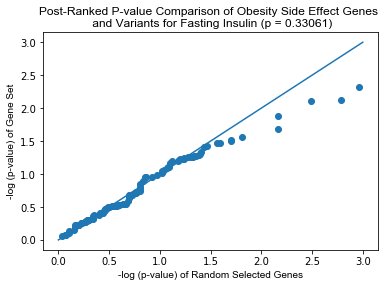

In [66]:
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[0][1].values)),( -np.log10(all_sorted_genes[2][4].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for Fasting Insulin (''p'' = 0.33061)', **csfont )
plt.savefig('obesity_se_fasting.png', dpi = 600)


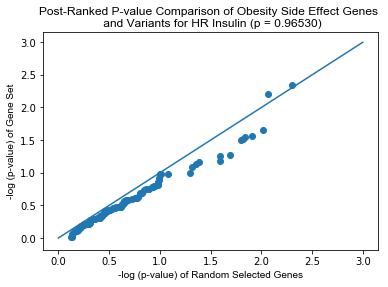

In [67]:
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[1][2].values)),( -np.log10(all_sorted_genes[3][5].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for HR Insulin (''p'' = 0.96530)', **csfont )
plt.savefig('obesity_se_hrinsulin.png', dpi = 600)


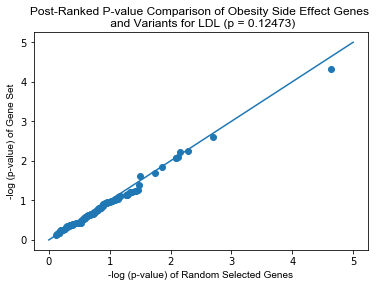

In [68]:
plt.plot([0,5],[0,5])
plt.scatter((- np.log10(all_sorted_random[2][3].values)),( -np.log10(all_sorted_genes[4][6].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for LDL (''p'' = 0.12473)', **csfont )
plt.savefig('obesity_se_ldl.png', dpi = 600)


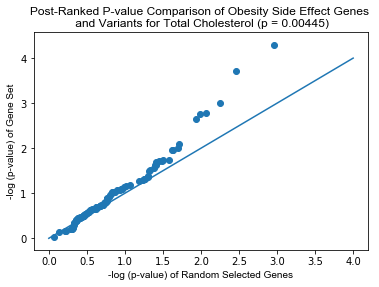

In [77]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[3][4].values)),( -np.log10(all_sorted_genes[5][7].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for Total Cholesterol (''p'' = 0.00445)', **csfont )
plt.savefig('obesity_se_tchol1.png', dpi = 600)


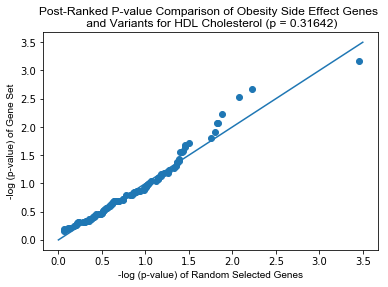

In [70]:
plt.plot([0,3.5],[0,3.5])
plt.scatter((- np.log10(all_sorted_random[4][5].values)),( -np.log10(all_sorted_genes[6][8].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for HDL Cholesterol (''p'' = 0.31642)', **csfont )
plt.savefig('obesity_se_hdl.png', dpi = 600)


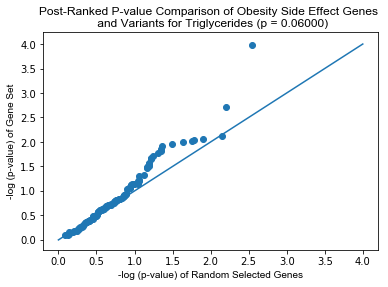

In [71]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[5][6].values)),( -np.log10(all_sorted_genes[7][9].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for Triglycerides (''p'' = 0.06000)', **csfont )
plt.savefig('obesity_se_tri.png', dpi = 600)


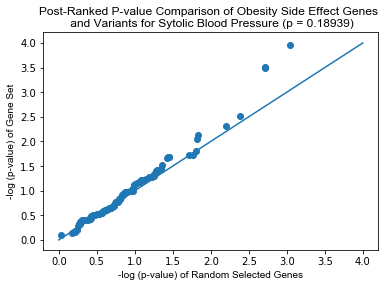

In [72]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[6][7].values)),( -np.log10(all_sorted_genes[8][10].values,)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for Sytolic Blood Pressure (''p'' = 0.18939)', **csfont )
plt.savefig('obesity_se_sbp.png', dpi = 600)


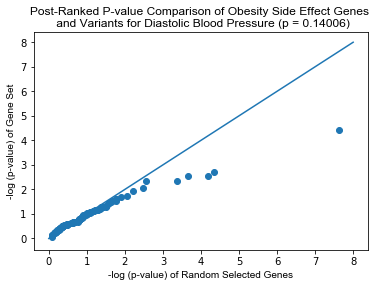

In [73]:
plt.plot([0,8],[0,8])
plt.scatter((- np.log10(all_sorted_random[7][8].values)),( -np.log10(all_sorted_genes[9][11].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for Diastolic Blood Pressure (''p'' = 0.14006)', **csfont )
plt.savefig('obesity_se_dbp.png', dpi = 600)


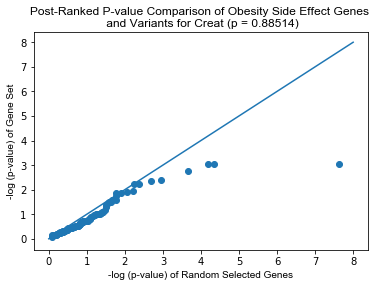

In [74]:
plt.plot([0,8],[0,8])
plt.scatter((- np.log10(all_sorted_random[8][9].values)),( -np.log10(all_sorted_genes[10][12].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for Creat (''p'' = 0.88514)', **csfont )
plt.savefig('obesity_se_creat.png', dpi = 600)


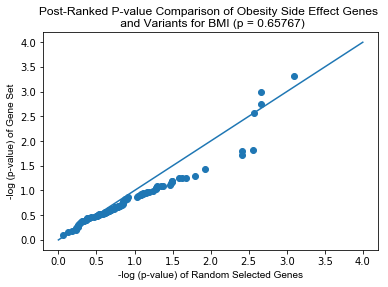

In [79]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[9][10].values)),( -np.log10(all_sorted_genes[11][13].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Obesity Side Effect Genes \n and Variants for BMI (''p'' = 0.65767)', **csfont )
plt.savefig('obesity_se_bmi1.png', dpi = 600)
